<a href="https://colab.research.google.com/github/mickeykubo/dash/blob/master/fastai_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fast.ai のインストールとテスト on Google Colab 


In [0]:
!pip3 install https://download.pytorch.org/whl/cu80/torch-1.0.0-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision
!pip3 install fastai
!pip3 install Pillow==4.0.0

# 訓練モジュール






---



---




In [0]:
from fastai import *
from fastai.vision import *

In [4]:
path = untar_data(URLs.MNIST_SAMPLE)
path

PosixPath('/root/.fastai/data/mnist_sample')

In [0]:
data = ImageDataBunch.from_folder(path)
#data = ImageDataBunch.from_folder(path, train='training', valid='testing', size=12)

In [0]:
model = simple_cnn((3,16,16,2))

In [0]:
learn = Learner(data,model,metrics=[accuracy])

In [8]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


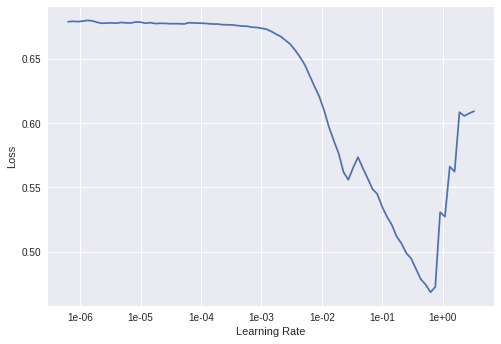

In [9]:
learn.recorder.plot()

In [10]:
learn.fit(1,1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.102187,0.070648,0.976448


In [26]:
learn.fit_one_cycle(3,max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.012822,0.016898,0.994603
2,0.009314,0.017104,0.994112
3,0.005167,0.012586,0.995584


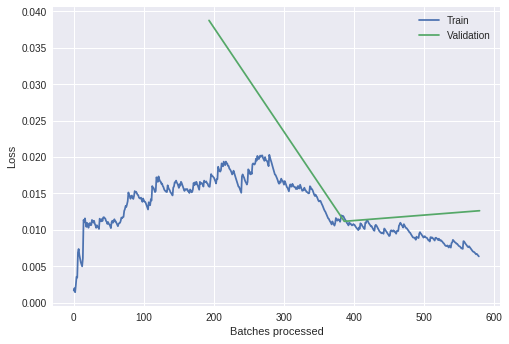

In [22]:
learn.recorder.plot_losses()

In [0]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(data, preds, y, losses)

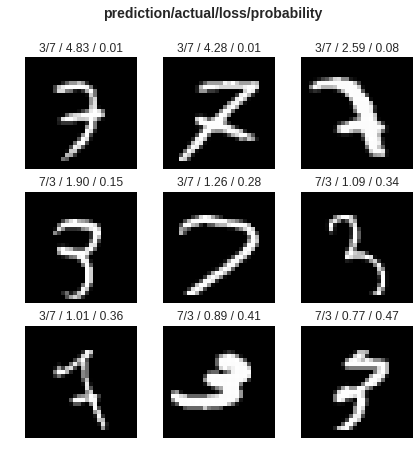

In [28]:
interp.plot_top_losses(9, figsize=(7,7))

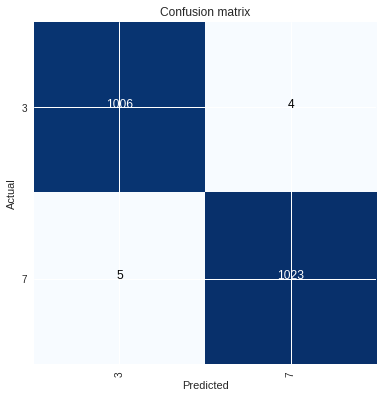

In [29]:
interp.plot_confusion_matrix()

In [0]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)

In [31]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy
1,0.172892,0.109038,0.966634


In [32]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


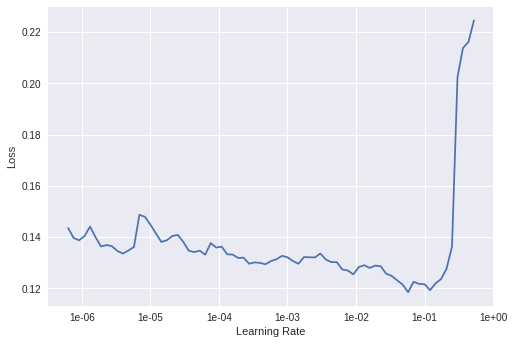

In [33]:
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(1,max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.028815,0.012960,0.994112


In [0]:
learn.unfreeze()

In [36]:
learn.fit_one_cycle(1,max_lr=(1e-4,1e-3,1e-2) )

epoch,train_loss,valid_loss,accuracy
1,0.017575,0.000768,1.000000


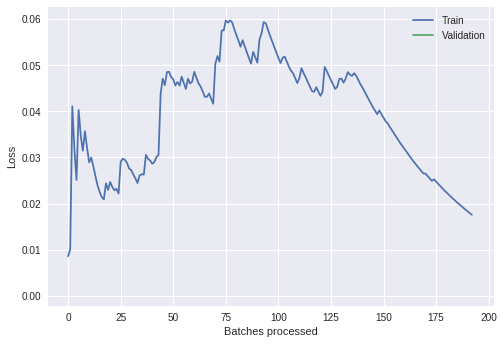

In [37]:
learn.recorder.plot_losses()

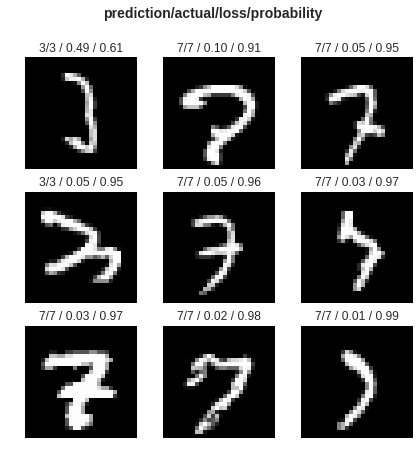

In [41]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(data, preds, y, losses)
interp.plot_top_losses(9, figsize=(7,7))

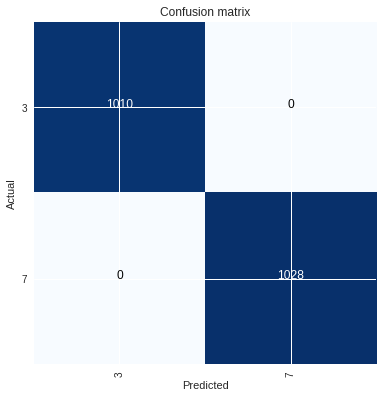

In [42]:
interp.plot_confusion_matrix()

In [43]:
path = untar_data(URLs.CIFAR)
path

PosixPath('/root/.fastai/data/cifar10')

In [0]:
data = ImageDataBunch.from_folder(path, valid='test', size=24)

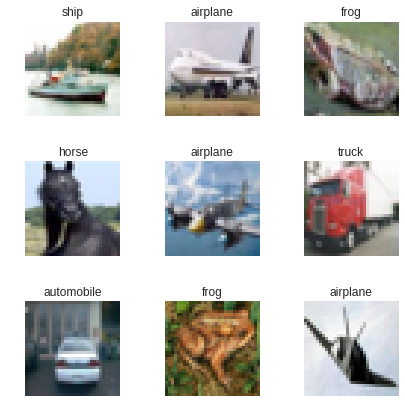

In [46]:
data.normalize()
data.show_batch(rows=3, figsize=(6,6))

In [65]:
learn = create_cnn(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 85258315.81it/s]


In [66]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


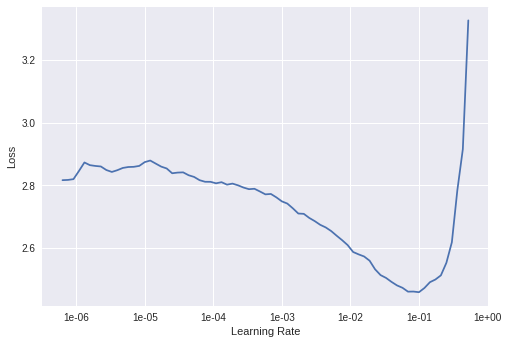

In [67]:
learn.recorder.plot()

In [70]:
learn.fit_one_cycle(3,max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.922137,0.858550,0.696600
2,0.704690,0.693288,0.762000
3,0.552394,0.558676,0.803000


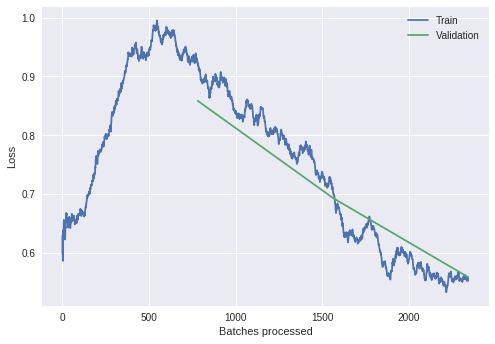

In [71]:
learn.recorder.plot_losses()

In [0]:
#learn.unfreeze()
learn.fit_one_cycle(300,max_lr=1e-3 )

epoch,train_loss,valid_loss,accuracy


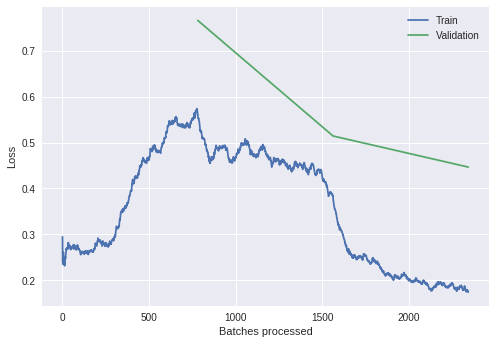

In [77]:
learn.recorder.plot_losses()

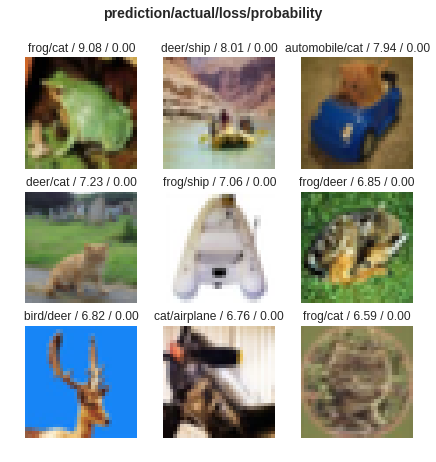

In [74]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(data, preds, y, losses)
interp.plot_top_losses(9, figsize=(7,7))

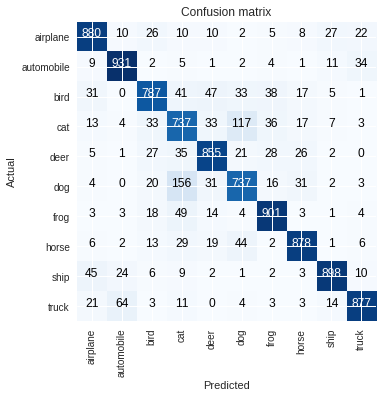

In [75]:
interp.plot_confusion_matrix()

# 表形式データの学習


In [0]:
from fastai import *

In [0]:
from fastai.tabular import * 

In [0]:
path = untar_data(URLs.ADULT_SAMPLE)

In [0]:
df = pd.read_csv(path/'adult.csv')

In [0]:
procs = [FillMissing, Categorify, Normalize] #前処理の種類を準備．
valid_idx = range(len(df)-2000, len(df)) #検証用データのインデックスを準備．
dep_var = '>=50k' #従属変数名とカテゴリー変数が格納されている列リストを準備．
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [0]:
# DataBunchのインスタンスdataを生成．
data = TabularDataBunch.from_df(path, df, dep_var, 
valid_idx=valid_idx, procs=procs, cat_names=cat_names)

In [0]:
#深層学習(PyTorch)の学習器インスタンスlearnを生成し，fitメソッドで訓練．引数はエポック数と学習率．
learn = tabular_learner(data, layers=[200,100], emb_szs={'native-country': 10}, metrics=accuracy)
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.338148,0.316442,0.853000


# 画像データの例

In [0]:
from fastai.vision import *

In [0]:
path = untar_data(URLs.CIFAR)
data = ImageDataBunch.from_folder(path)

In [0]:
#learn = create_cnn(data, models.resnet18, metrics=accuracy)
learn = create_cnn(data, models.resnet18, metrics=accuracy, callback_fns=ShowGraph)
learn.fit(1)

# 協調フィルタリングの例

In [0]:
from fastai.collab import * 

In [0]:
path = untar_data(URLs.ML_SAMPLE)
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [0]:
data = CollabDataBunch.from_df(ratings)

In [0]:
learn = collab_learner(data, n_factors=50, y_range=(0.,5.))

In [0]:
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss
1,2.443485,2.030991
2,1.125733,0.664717
3,0.750798,0.635108
4,0.633702,0.631200
5,0.574826,0.627643
